In [ ]:
#PokeProject

In [31]:
import pandas as pd 
import json
import requests 
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np
from scipy.stats import linregress
import os

In [32]:
#Create Initial DataFrame
d = pd.DataFrame({"id":[""]})

#How many number of pokemon do you want 
y = 151

#loop through PokeAPI first 151 pokemons
for x in range(1,y+1):
    
    #Get API url
    r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{x}/").json()
    
    #Pokemon ID
    i = r["id"]
    d.loc[x,"id"] = i
    
    #Pokemon Name
    n = r["name"]
    d.loc[x,"name"] = n
    
    #Pokemon Type
    t1 = r["types"][0]["type"]["name"]
    d.loc[x,"type 1"] = t1
    try:
        t2 = r["types"][1]["type"]["name"]
        d.loc[x,"type 2"] = t2
    except IndexError: 
        d.loc[x,"type 2"] = "na"
    
    #Pokemon Height
    h = r["height"]
    d.loc[x,"height"] = h
    
    #Pokemon Base Stat/HP
    b = r["stats"][0]["base_stat"]
    d.loc[x,"HP"] = b
    
    #Pokemon HP
    w = r["weight"]
    d.loc[x,"weight"] = w
    
d.drop(0, axis=0,inplace=True)
d.head(20)
#d = original DataFrame of 151 pokemon

,id,name,type 1,type 2,height,HP,weight
1,1,bulbasaur,grass,poison,7.0,45.0,69.0
2,2,ivysaur,grass,poison,10.0,60.0,130.0
3,3,venusaur,grass,poison,20.0,80.0,1000.0
4,4,charmander,fire,na,6.0,39.0,85.0
5,5,charmeleon,fire,na,11.0,58.0,190.0
6,6,charizard,fire,flying,17.0,78.0,905.0
7,7,squirtle,water,na,5.0,44.0,90.0
8,8,wartortle,water,na,10.0,59.0,225.0
9,9,blastoise,water,na,16.0,79.0,855.0
10,10,caterpie,bug,na,3.0,45.0,29.0


In [33]:
# import csv from resources folder
csv_path = "Resources/Pokemon.csv"

# create DataFrame from csv
df = pd.read_csv(csv_path)

#strart index at 1
df.index = np.arange(1, len(df) + 1)

#exclude any entry with "mega" in name
df = df[~df["Name"].str.contains("Mega")]

#reset index
df.index = np.arange(1, len(df) + 1)

# change dataframe to only the first 151 pokemon
df = df.iloc[0:151,:]

#reanme the "Name" column to "name"
df = df.rename(columns={"Name": "name"})

df.tail(20)

,#,name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
132,132,Ditto,Normal,NaN,288,48,48,48,48,48,48,1,False
133,133,Eevee,Normal,NaN,325,55,55,50,45,65,55,1,False
134,134,Vaporeon,Water,NaN,525,130,65,60,110,95,65,1,False
135,135,Jolteon,Electric,NaN,525,65,65,60,110,95,130,1,False
136,136,Flareon,Fire,NaN,525,65,130,60,95,110,65,1,False
137,137,Porygon,Normal,NaN,395,65,60,70,85,75,40,1,False
138,138,Omanyte,Rock,Water,355,35,40,100,90,55,35,1,False
139,139,Omastar,Rock,Water,495,70,60,125,115,70,55,1,False
140,140,Kabuto,Rock,Water,355,30,80,90,55,45,55,1,False
141,141,Kabutops,Rock,Water,495,60,115,105,65,70,80,1,False


In [34]:
# Join the two dataframes on the pokemon name
df1 = pd.merge(d, df, on="name")

# Check the data types of the "name" column
print(d["name"].dtype)
print(df["name"].dtype)

# Standardize the case of the values
d["name"] = d["name"].str.lower()
df["name"] = df["name"].str.lower()

# Remove leading/trailing whitespaces
d["name"] = d["name"].str.strip()
df["name"] = df["name"].str.strip()

# Join the two dataframes on the pokemon name
df1 = pd.merge(d, df, on="name")

#drop the HP_Y column
df1 = df1.drop(columns=["HP_y"])

#drop the Type 1 and Type 2 Columns
df1 = df1.drop(columns=["Type 1", "Type 2"])

#rename the HP_X column to HP
df1.columns = df1.columns.str.replace("HP_x", "HP")

#remove the # column
df1 = df1.drop(columns=["#"])

# save as csv file to Rsources folder
df1.to_csv("Resources/Pokemon1.csv", index=False)

# move total column to the end and keep the rest of the columns in the same order
cols_at_end = ["Total"]
df1 = df1[[c for c in df1 if c not in cols_at_end] + [c for c in cols_at_end if c in df1]]

# change name of the total column to "Total Stats"
df1 = df1.rename(columns={"Total": "Total Stats"})

# change the index to start at 1 instead of 0
df1.index = np.arange(1, len(df1) + 1)

df1.tail()

object
object


,id,name,type 1,type 2,height,HP,weight,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Stats
143,147,dratini,dragon,na,18.0,41.0,33.0,64,45,50,50,50,1,False,300
144,148,dragonair,dragon,na,40.0,61.0,165.0,84,65,70,70,70,1,False,420
145,149,dragonite,dragon,flying,22.0,91.0,2100.0,134,95,100,100,80,1,False,600
146,150,mewtwo,psychic,na,20.0,106.0,1220.0,110,90,154,90,130,1,True,680
147,151,mew,psychic,na,4.0,100.0,40.0,100,100,100,100,100,1,False,600


In [35]:
#Group by type and calculate average HP per group into a new DataFrame
d1 = pd.DataFrame(df1.groupby(["type 1"])["HP"].mean())
d2 = d1.reset_index()
d2["HP"] = round(d2["HP"],1)
d2
#d2 = HP per type DataFrame

,type 1,HP
0,bug,55.4
1,dragon,64.3
2,electric,54.4
3,fairy,82.5
4,fighting,63.6
5,fire,63.8
6,ghost,45.0
7,grass,65.0
8,ground,58.1
9,ice,77.5


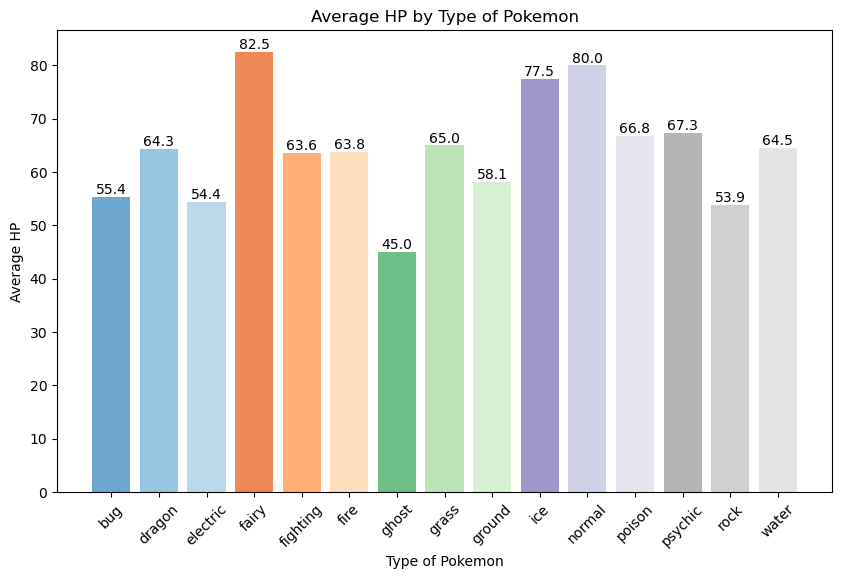

In [36]:
# Set a larger figure size
plt.figure(figsize=(10, 6))

# Set x axis and y axis
x_axis = d2["type 1"]
y_axis = d2["HP"]

# Define a color map with a unique color for each bar
colors = plt.cm.tab20c(np.linspace(0, 1, len(d2)))

# Plot average HP for each type of Pokemon with a unique color for each bar
plt.bar(x_axis, y_axis, color=colors, alpha=0.7)

# Add data labels to the bars
for x, y in zip(x_axis, y_axis):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Customize plot labels and title
plt.xticks(rotation=45)
plt.xlabel("Type of Pokemon")
plt.ylabel("Average HP")
plt.title("Average HP by Type of Pokemon")

# save the plot to the Resources folder
plt.savefig("Resources/Average HP by Type of Pokemon.png")

# Show the modified plot
plt.show()

In [37]:
# Group by type and calculate average Attack per group into a new DataFrame
d3 = pd.DataFrame(df1.groupby(["type 1"])["Attack"].mean())
d3 = d3.reset_index()

# Round the "Attack" values to the 2nd decimal place
d3["Attack"] = d3["Attack"].round(1)

# Print the information of d4 DataFrame
d3

# d4 is now the Attack per type DataFrame with rounded values

,type 1,Attack
0,bug,63.8
1,dragon,94.0
2,electric,62.0
3,fairy,57.5
4,fighting,102.9
5,fire,83.9
6,ghost,50.0
7,grass,70.7
8,ground,81.9
9,ice,67.5


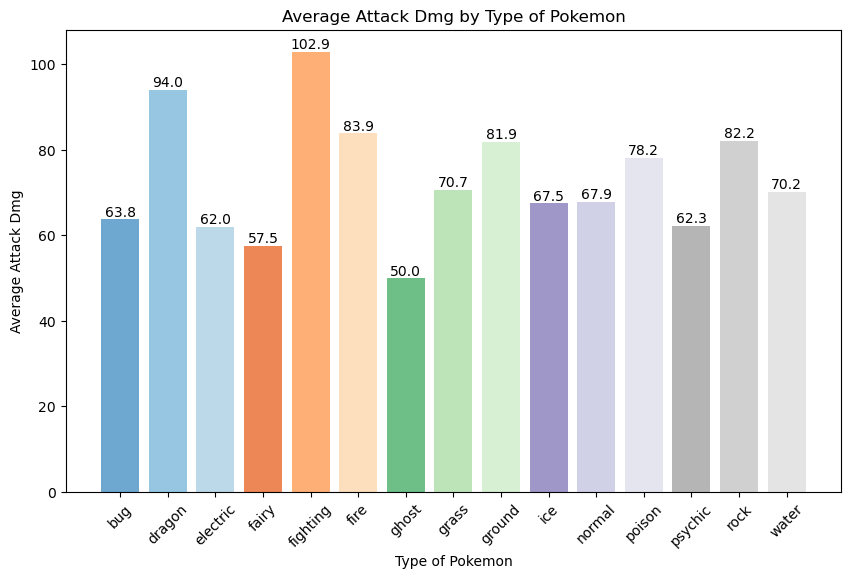

In [38]:
# Set a larger figure size
plt.figure(figsize=(10, 6))

# Set x axis and y axis
x_axis = d3["type 1"]
y_axis = d3["Attack"]

# Define a color map with a unique color for each bar
colors = plt.cm.tab20c(np.linspace(0, 1, len(d2)))

# Plot average HP for each type of Pokemon with a unique color for each bar
plt.bar(x_axis, y_axis, color=colors, alpha=0.7)

# Add data labels to the bars
for x, y in zip(x_axis, y_axis):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Customize plot labels and title
plt.xticks(rotation=45)
plt.xlabel("Type of Pokemon")
plt.ylabel("Average Attack Dmg")
plt.title("Average Attack Dmg by Type of Pokemon")

# save the plot to the Resources folder
plt.savefig("Resources/Average Attack Dmg by Type of Pokemon.png")

# Show the modified plot
plt.show()

In [39]:
# Group by type and calculate average Attack per group into a new DataFrame
d4 = pd.DataFrame(df1.groupby(["type 1"])["Defense"].mean())
d4 = d4.reset_index()

# Round the "Attack" values to the 2nd decimal place
d4["Defense"] = d4["Defense"].round(1)

# Print the information of d4 DataFrame
d4

# d4 is now the Attack per type DataFrame with rounded values

,type 1,Defense
0,bug,57.1
1,dragon,68.3
2,electric,64.7
3,fairy,60.5
4,fighting,61.0
5,fire,62.6
6,ghost,45.0
7,grass,69.6
8,ground,86.2
9,ice,67.5


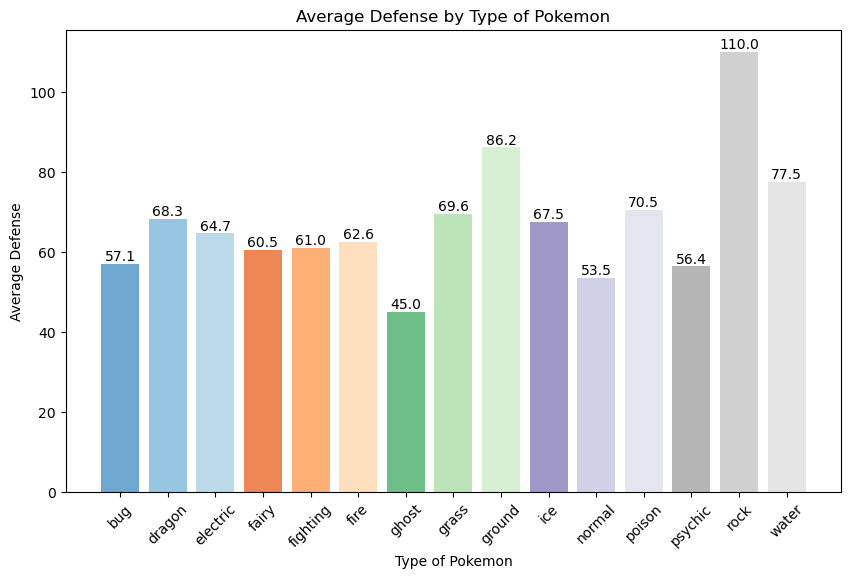

In [40]:

# Set a larger figure size
plt.figure(figsize=(10, 6))

# Set x axis and y axis
x_axis = d4["type 1"]
y_axis = d4["Defense"]

# Define a color map with a unique color for each bar
colors = plt.cm.tab20c(np.linspace(0, 1, len(d2)))

# Plot average HP for each type of Pokemon with a unique color for each bar
plt.bar(x_axis, y_axis, color=colors, alpha=0.7)

# Add data labels to the bars
for x, y in zip(x_axis, y_axis):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Customize plot labels and title
plt.xticks(rotation=45)
plt.xlabel("Type of Pokemon")
plt.ylabel("Average Defense")
plt.title("Average Defense by Type of Pokemon")

# save the plot to the Resources folder
plt.savefig("Resources/Average Defense by Type of Pokemon.png")

# Show the modified plot
plt.show()

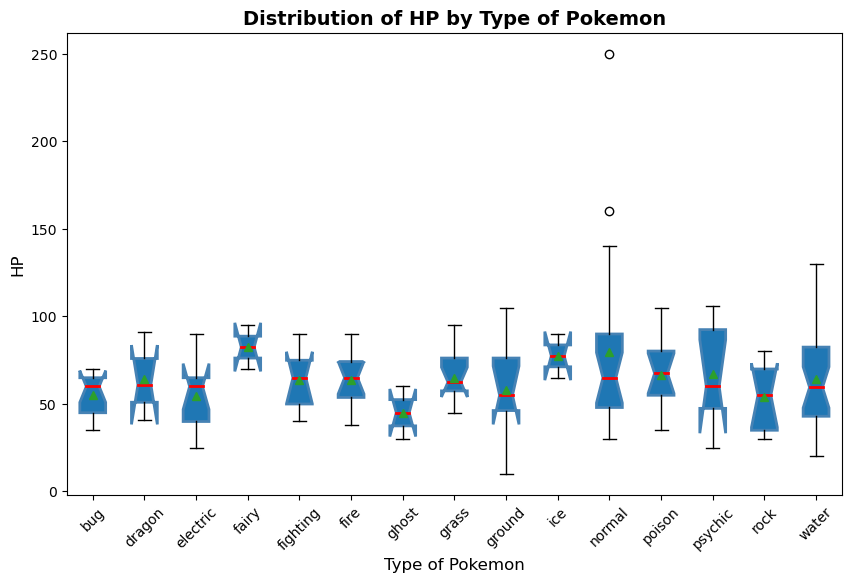

In [41]:
# Set a larger figure size
plt.figure(figsize=(10, 6))

# Group the data by "type 1" and extract the "HP" column for each group
grouped_data = df1.groupby("type 1")["HP"]

# Create a list to store the data for each group
data = [grouped_data.get_group(group) for group in grouped_data.groups]

# Create the boxplot to visualize the distribution of HP by type
boxprops = dict(linewidth=2, color='steelblue')
medianprops = dict(linestyle='-', linewidth=2, color='red')
plt.boxplot(data, labels=grouped_data.groups, showmeans=True, boxprops=boxprops,
            medianprops=medianprops, patch_artist=True, notch=True)

# Customize plot labels and title
plt.title("Distribution of HP by Type of Pokemon", fontsize=14, fontweight='bold')
plt.xlabel("Type of Pokemon", fontsize=12)
plt.ylabel("HP", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# save the plot to the Resources folder
plt.savefig("Resources/Distribution of HP by Type of Pokemon.png")

# Show the modified boxplot
plt.show()


In [42]:
#Count number of pokemon from each type in orginal 151
f = pd.DataFrame(d["type 1"].value_counts())

#f = frequency count of each type
f2 = f.reset_index()
f2.columns = ["type 1", "count"]
f2

#f2 = type count DataFrame

,type 1,count
0,water,28
1,normal,22
2,poison,14
3,grass,12
4,fire,12
5,bug,12
6,electric,9
7,rock,9
8,ground,8
9,psychic,8


In [43]:
#Merge hp per type and type count DataFrames
new = pd.merge(d2, f2, on = ["type 1"])
new["Frequency %"] = round(100*(new["count"]/d["type 1"].count()), 1)
new1 = new.sort_values("Frequency %", ascending = False)
new1
#new1 = type breakdown DataFrame

,type 1,HP,count,Frequency %
14,water,64.5,28,18.5
10,normal,80.0,22,14.6
11,poison,66.8,14,9.3
0,bug,55.4,12,7.9
5,fire,63.8,12,7.9
7,grass,65.0,12,7.9
2,electric,54.4,9,6.0
13,rock,53.9,9,6.0
8,ground,58.1,8,5.3
12,psychic,67.3,8,5.3


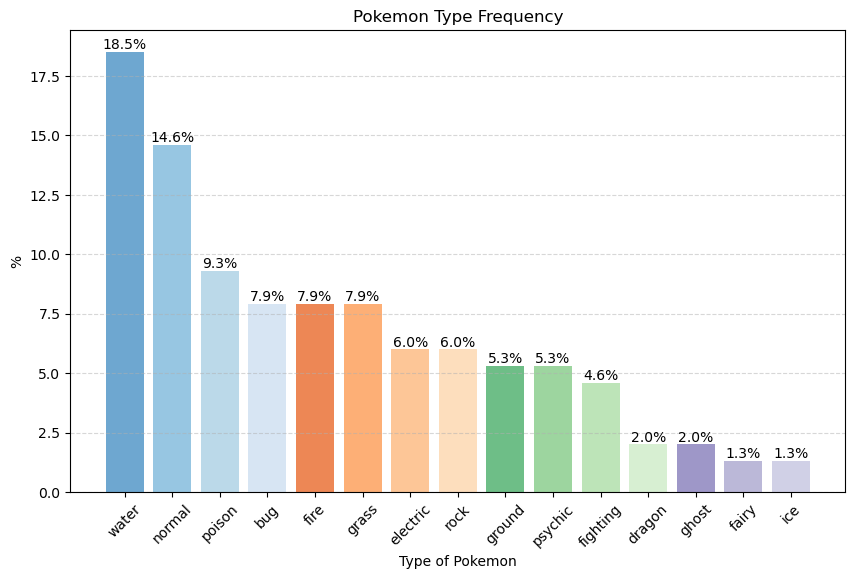

In [44]:
# Set a larger figure size
plt.figure(figsize=(10, 6))

# Plot type count frequencies with gridlines and a color palette
colors = plt.cm.tab20c(np.arange(len(new1)))
plt.bar(new1["type 1"], new1["Frequency %"], color=colors, alpha=0.7)

# Add data labels to the bars
for i, (x, y) in enumerate(zip(new1["type 1"], new1["Frequency %"])):
    plt.text(x, y, f"{y}%", ha='center', va='bottom')

# Customize plot labels and title
plt.xticks(rotation=45)
plt.xlabel("Type of Pokemon")
plt.ylabel("%")
plt.title("Pokemon Type Frequency")

# Enable gridlines
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# save the plot to the Resources folder
plt.savefig("Resources/Pokemon Type Frequency.png")

# Show the modified plot
plt.show()

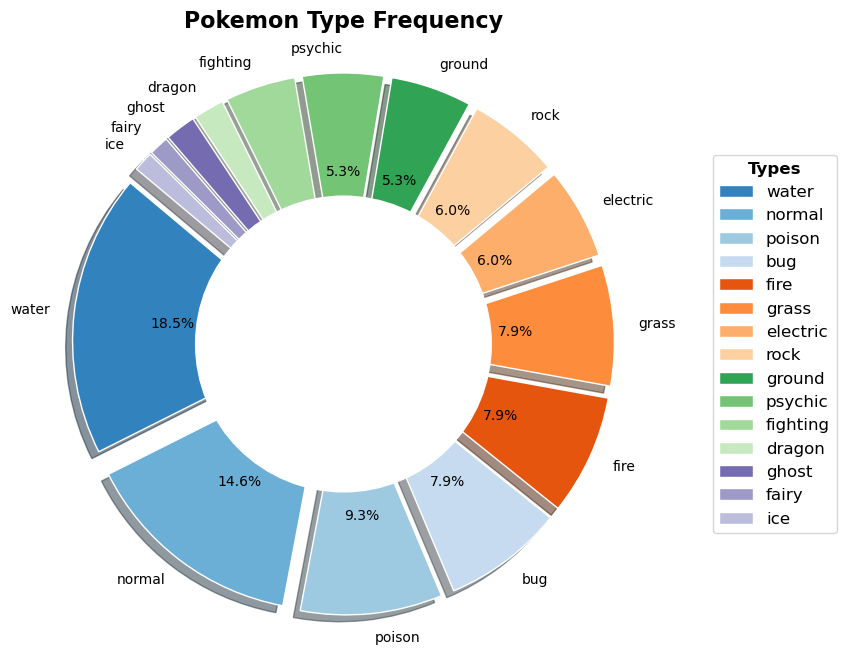

In [45]:
# Set a larger figure size
plt.figure(figsize=(12, 8))

# Plot type count frequencies with gridlines and a color palette
colors = plt.cm.tab20c(np.arange(len(new1)))
explode = [0.1] * len(new1)  # Explode each slice for emphasis
wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}  # Set wedge properties

# Calculate the percentages with one decimal place
percentages = [f"{p:.1f}%" for p in new1["Frequency %"]]

# Plot the pie chart with adjusted autopct format
plt.pie(new1["Frequency %"], labels=new1["type 1"], colors=colors, 
        autopct=lambda pct: f"{pct:.1f}%" if pct >= 5 else '', 
        shadow=True, startangle=140, explode=explode, wedgeprops=wedgeprops)

# Add a circle at the center to make it a donut chart (optional)
circle = plt.Circle((0, 0), 0.6, color='white')
plt.gca().add_artist(circle)

# Customize plot labels and title
plt.title("Pokemon Type Frequency", fontsize=16, fontweight='bold')

# Adjust the legend position
legend = plt.legend(bbox_to_anchor=(1.2, 0.5), loc="center", fontsize=12)

# Set the legend title
legend.set_title("Types", prop={'size': 12, 'weight': 'bold'})

# save the plot to the Resources folder
plt.savefig("Resources/Pokemon Type Frequency Pie Chart.png")

# Show the modified plot
plt.show()


In [46]:
# create a datafram with the top 10 pokemon with the highest special attack and only show the name and special attack columns
Special_Attack_DF = df1.nlargest(10, ['Sp. Atk'])[['name','Sp. Atk']]
Special_Attack_DF


,name,Sp. Atk
146,mewtwo,154
63,alakazam,135
91,gengar,130
100,exeggutor,125
141,zapdos,125
142,moltres,125
62,kadabra,120
80,magneton,120
90,haunter,115
120,jynx,115


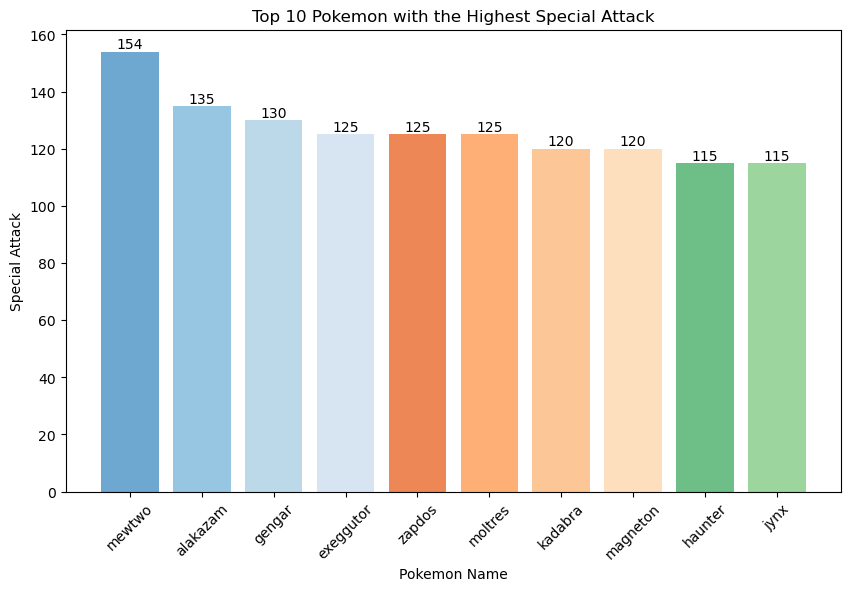

In [47]:
# Set a larger figure size
plt.figure(figsize=(10, 6))

# Set x axis and y axis
x_axis = Special_Attack_DF["name"].head(10)
y_axis = Special_Attack_DF["Sp. Atk"].head(10)

# Define a color map with a unique color for each bar
colors = plt.cm.tab20c(np.arange(len(Special_Attack_DF)))

# Plot the bar chart with unique colors
plt.bar(x_axis, y_axis, color=colors, alpha=0.7)

# Add data labels to the bars
for x, y in zip(x_axis, y_axis):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Customize plot labels and title
plt.xticks(rotation=45)
plt.xlabel("Pokemon Name")
plt.ylabel("Special Attack")
plt.title("Top 10 Pokemon with the Highest Special Attack")

# save the plot to the Resources folder
plt.savefig("Resources/Top 10 Pokemon with the Highest Special Attack.png")

# Show the modified plot
plt.show()


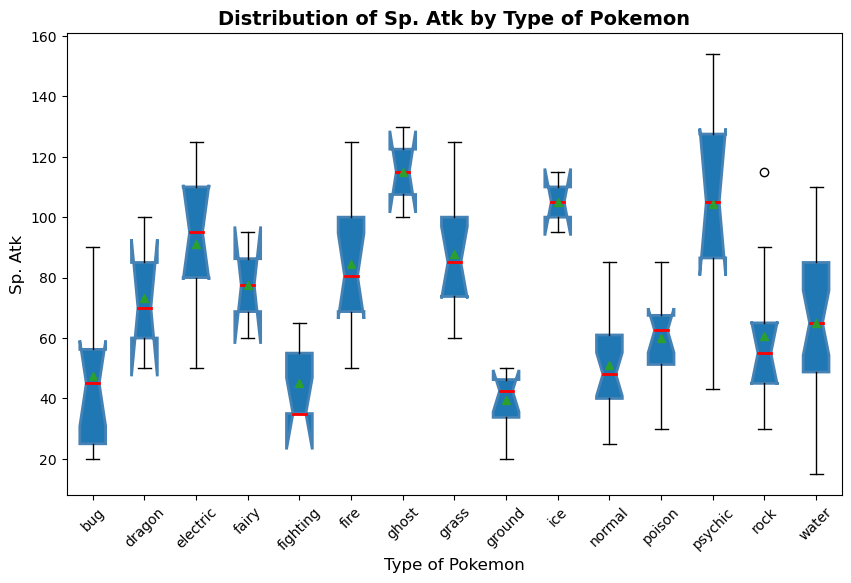

In [48]:
# create a boxplot to show the distribution of special attack for each type of pokemon
# Set a larger figure size
plt.figure(figsize=(10, 6))

# Group the data by "type 1" and extract the "Sp. Atk" column for each group
grouped_data = df1.groupby("type 1")["Sp. Atk"]

# Create a list to store the data for each group
data = [grouped_data.get_group(group) for group in grouped_data.groups]

# Create the boxplot to visualize the distribution of Sp. Atk by type
boxprops = dict(linewidth=2, color='steelblue')
medianprops = dict(linestyle='-', linewidth=2, color='red')
plt.boxplot(data, labels=grouped_data.groups, showmeans=True, boxprops=boxprops,
            medianprops=medianprops, patch_artist=True, notch=True)

# Customize plot labels and title
plt.title("Distribution of Sp. Atk by Type of Pokemon", fontsize=14, fontweight='bold')
plt.xlabel("Type of Pokemon", fontsize=12)
plt.ylabel("Sp. Atk", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# save the plot to the Resources folder
plt.savefig("Resources/Distribution of Sp. Atk by Type of Pokemon.png")

# Show the modified boxplot
plt.show()

In [49]:
# find the outlier of the rock type pokemon
# Filter the DataFrame for the "rock" type
rock_type_data = df1[df1["type 1"] == "rock"]

# Identify the outliers in the "Sp. Atk" column for the "rock" type
outliers = rock_type_data[rock_type_data["Sp. Atk"] > rock_type_data["Sp. Atk"].quantile(0.75) + 1.5 * (rock_type_data["Sp. Atk"].quantile(0.75) - rock_type_data["Sp. Atk"].quantile(0.25))]

# Get the names of the outlier Pokemon
outlier_pokemon = outliers["name"].tolist()

# Print the outlier Pokemon and what the average Sp. Atk is for the "rock" type and round the number to 2 decimal places
print(f"The outlier Pokemon for the rock type is {outlier_pokemon} and the average Sp. Atk for the rock type is {round(rock_type_data['Sp. Atk'].mean(), 2)}.")

# show the all the information of the outlier pokemon
outliers

The outlier Pokemon for the rock type is ['omastar'] and the average Sp. Atk for the rock type is 60.56.


,id,name,type 1,type 2,height,HP,weight,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Stats
135,139,omastar,rock,water,10.0,70.0,350.0,60,125,115,70,55,1,False,495


In [50]:
# create a datafram with the top 10 pokemon with the highest special defense and only show the name and special defense columns
Special_Defense_DF = df1.nlargest(10, ['Sp. Def'])[['name','Sp. Def']]
Special_Defense_DF


,name,Sp. Def
140,articuno,125
71,tentacruel,120
94,hypno,115
103,hitmonlee,110
104,hitmonchan,110
132,flareon,110
139,snorlax,110
9,blastoise,105
110,chansey,105
3,venusaur,100


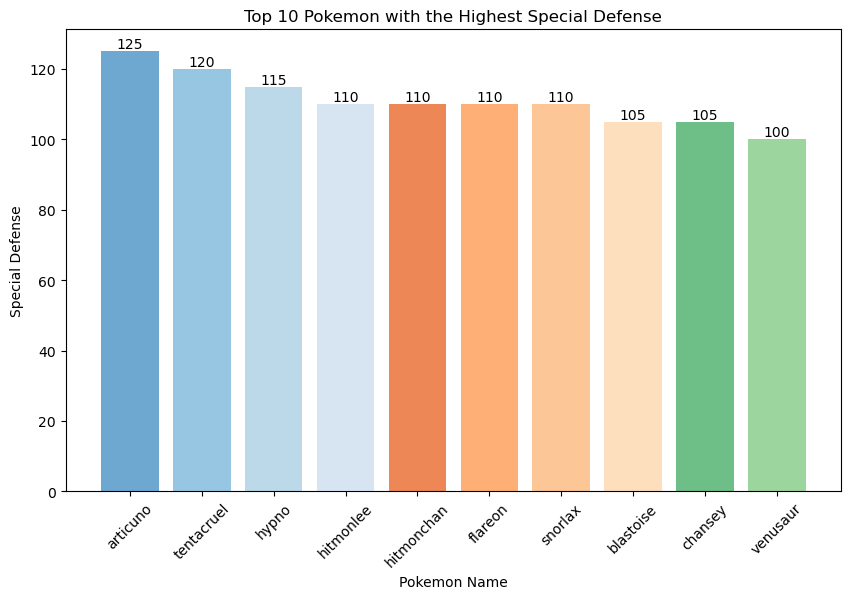

In [51]:
# create a bar chart with the top 10 pokemon with the highest special defense
# Set a larger figure size
plt.figure(figsize=(10, 6))

# Set x axis and y axis
x_axis = Special_Defense_DF["name"].head(10)
y_axis = Special_Defense_DF["Sp. Def"].head(10)

# Define a color map with a unique color for each bar
colors = plt.cm.tab20c(np.arange(len(Special_Defense_DF)))

# Plot the bar chart with unique colors
plt.bar(x_axis, y_axis, color=colors, alpha=0.7)

# Add data labels to the bars
for x, y in zip(x_axis, y_axis):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Customize plot labels and title
plt.xticks(rotation=45)
plt.xlabel("Pokemon Name")
plt.ylabel("Special Defense")
plt.title("Top 10 Pokemon with the Highest Special Defense")

# save the plot to the Resources folder
plt.savefig("Resources/Top 10 Pokemon with the Highest Special Defense.png")

# Show the modified plot
plt.show()

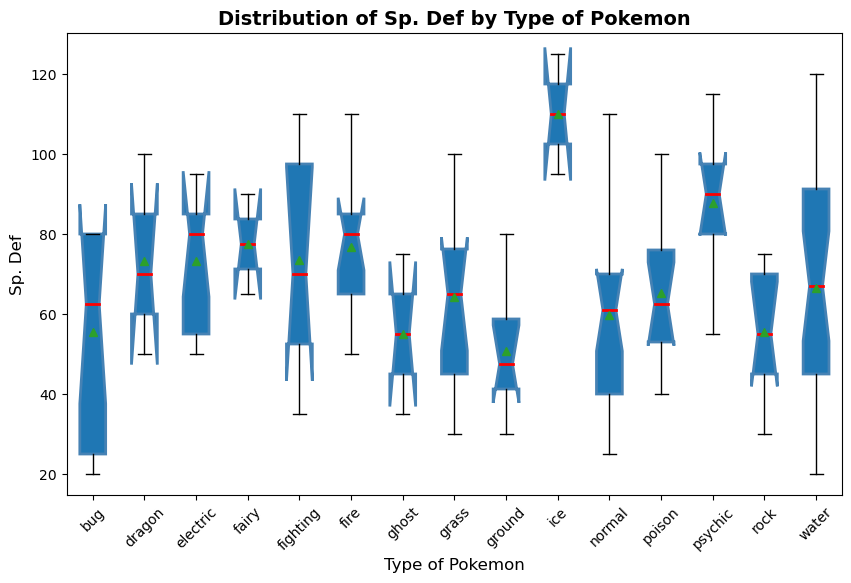

In [52]:
# create a boxplot to show the distribution of special defense for each type of pokemon
# Set a larger figure size
plt.figure(figsize=(10, 6))

# Group the data by "type 1" and extract the "Sp. Def" column for each group
grouped_data = df1.groupby("type 1")["Sp. Def"]

# Create a list to store the data for each group
data = [grouped_data.get_group(group) for group in grouped_data.groups]

# Create the boxplot to visualize the distribution of Sp. Def by type
boxprops = dict(linewidth=2, color='steelblue')
medianprops = dict(linestyle='-', linewidth=2, color='red')
plt.boxplot(data, labels=grouped_data.groups, showmeans=True, boxprops=boxprops,
            medianprops=medianprops, patch_artist=True, notch=True)

# Customize plot labels and title
plt.title("Distribution of Sp. Def by Type of Pokemon", fontsize=14, fontweight='bold')
plt.xlabel("Type of Pokemon", fontsize=12)
plt.ylabel("Sp. Def", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# save the plot to the Resources folder
plt.savefig("Resources/Distribution of Sp. Def by Type of Pokemon.png")

# Show the modified boxplot
plt.show()

In [53]:
# create a function for linear regression
# create a function for linear regression
def linreg(x_values, y_values, title, x_label, y_label, text_coordinates):

    # run regression on pokemon data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept

    # Get the equation of the line
    line_eq = "y = {:.2f}x + {:.2f}".format(slope, intercept)

    # Create scatter plot and plot the regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(x_values, y_values, color='steelblue', alpha=0.7, edgecolors='white')
    plt.plot(x_values, regress_values, color='red', linewidth=2)

    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=12, color="red")

    # Customize plot labels and title
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # Add gridlines
    plt.grid(True, linestyle='--', alpha=0.5)

    # Add a legend
    plt.legend(['Regression Line'])

    # Show the modified plot
    plt.show()

    # Print the value of r
    print("Correlation coefficient (r^2): {:.2f}".format(rvalue))

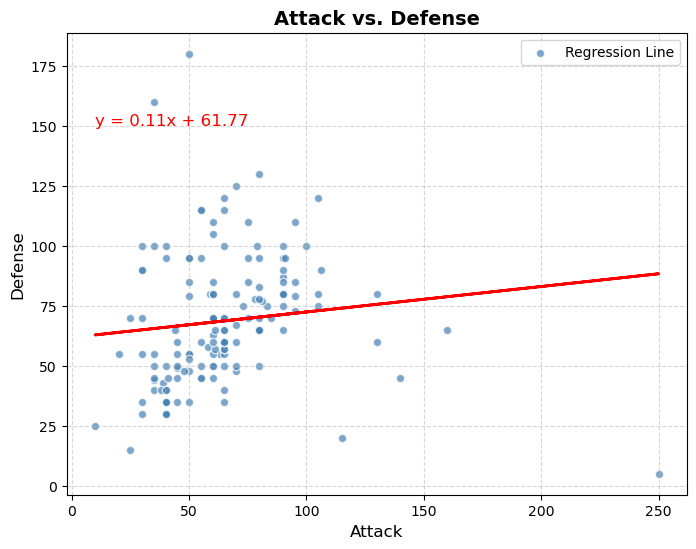

Correlation coefficient (r^2): 0.11


<Figure size 640x480 with 0 Axes>

In [54]:
# Linear regression for Attack and Defense using linreg() function
x_values = df1["HP"]
y_values = df1["Defense"]

# Call linreg() function
linreg(x_values, y_values, "Attack vs. Defense", "Attack", "Defense", (10, 150))

# Save the plot to the Resources folder
plt.savefig("Resources/Attack vs. Defense.png")





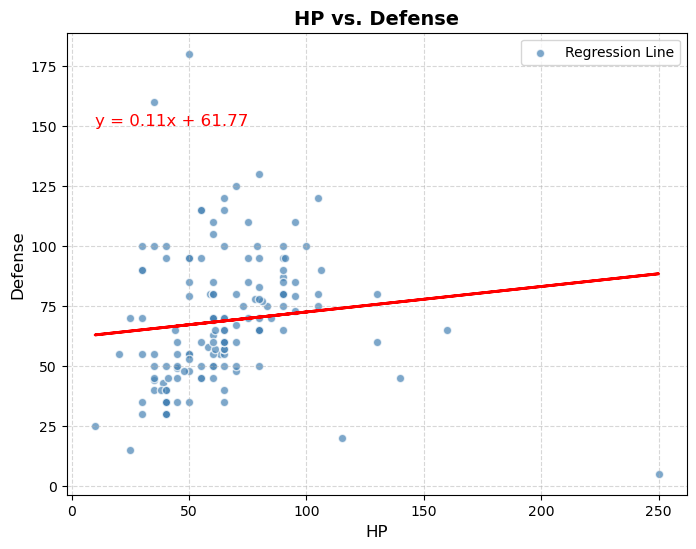

Correlation coefficient (r^2): 0.11


<Figure size 640x480 with 0 Axes>

In [55]:
# Linear regression for Attack and Defense using linreg() function
x_values = df1["HP"]
y_values = df1["Defense"]

# Call linreg() function
linreg(x_values, y_values, "HP vs. Defense", "HP", "Defense", (10, 150))

# Save the plot to the Resources folder
plt.savefig("Resources/HP vs. Defense.png")

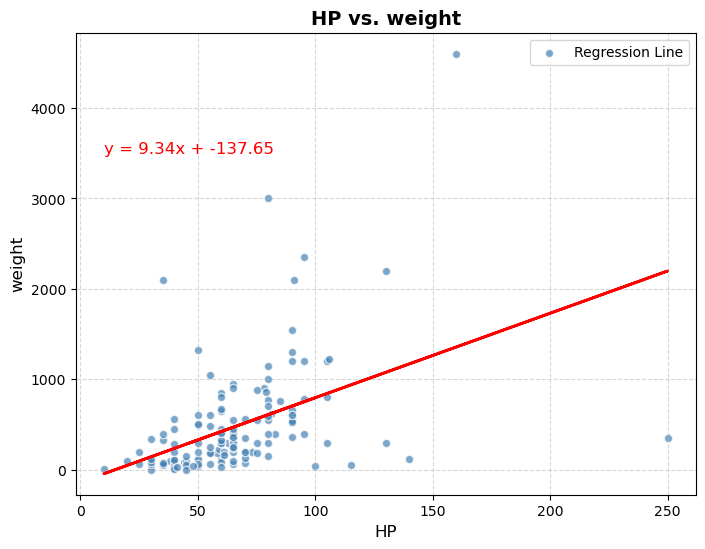

Correlation coefficient (r^2): 0.45


<Figure size 640x480 with 0 Axes>

In [56]:
# Linear regression for Attack and Defense using linreg() function
x_values = df1["HP"]
y_values = df1["weight"]

# Call linreg() function
linreg(x_values, y_values, "HP vs. weight", "HP", "weight", (10, 3500))

# Save the plot to the Resources folder
plt.savefig("Resources/HP vs. weight.png")

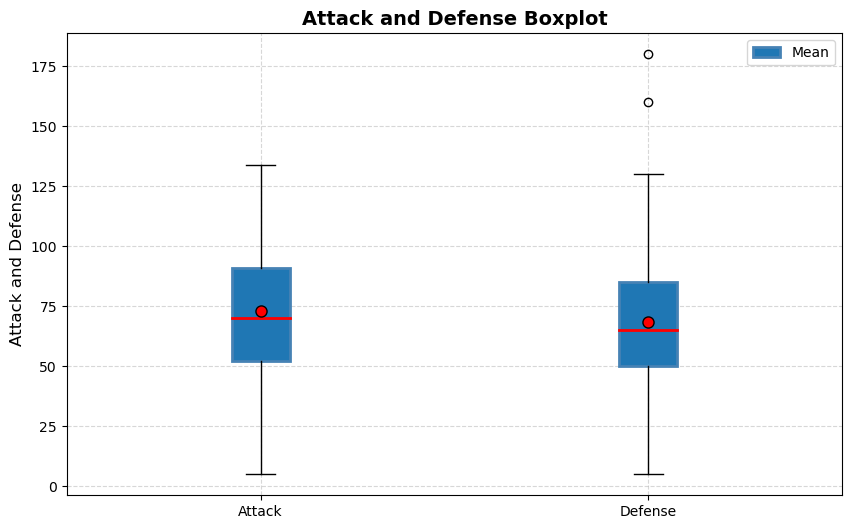

In [57]:
# Set a larger figure size
plt.figure(figsize=(10, 6))

# Create a boxplot for attack and defense with the median
boxprops = dict(linewidth=2, color='steelblue')
medianprops = dict(linestyle='-', linewidth=2, color='red')
meanprops = dict(marker='o', markeredgecolor='black', markerfacecolor='red', markersize=8)
plt.boxplot([df1["Attack"], df1["Defense"]], labels=["Attack", "Defense"], showmeans=True,
            boxprops=boxprops, medianprops=medianprops, meanprops=meanprops, patch_artist=True)

# Customize plot labels and title
plt.title("Attack and Defense Boxplot", fontsize=14, fontweight='bold')
plt.ylabel("Attack and Defense", fontsize=12)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Add a legend
plt.legend(['Mean'])

# Save the plot to the Resources folder
plt.savefig("Resources/Attack and Defense Boxplot.png")

# Show the modified plot
plt.show()

In [67]:
# find the pokemon that are the outlier for defense

# Calculate the upper and lower bounds for defense
quartiles = df1["Defense"].quantile([0.25, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

# Find the pokemon that are outliers for defense
outliers = df1.loc[(df1["Defense"] < lower_bound) | (df1["Defense"] > upper_bound)]
outliers

,id,name,type 1,type 2,height,HP,weight,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Stats
88,91,cloyster,water,ice,15.0,50.0,1325.0,95,180,85,45,70,1,False,525
92,95,onix,rock,ground,88.0,35.0,2100.0,45,160,30,45,70,1,False,385


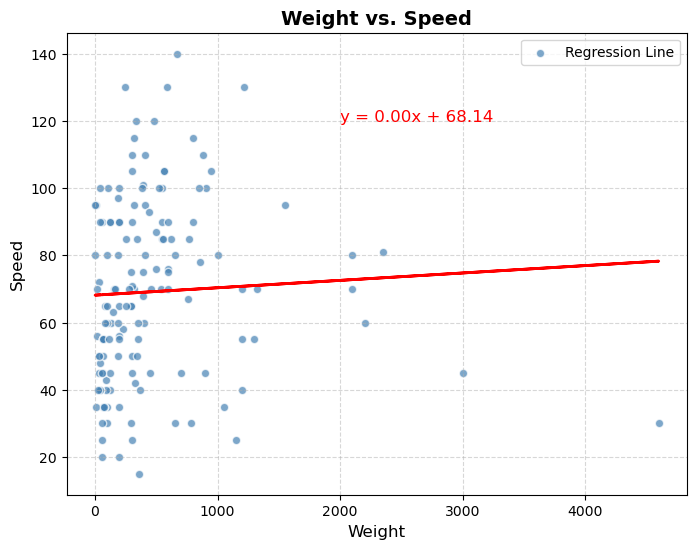

Correlation coefficient (r^2): 0.05


<Figure size 640x480 with 0 Axes>

In [58]:
# create a liner regression for weight and speed
x_values = df1["weight"]
y_values = df1["Speed"]

# Call linreg() function
linreg(x_values, y_values, "Weight vs. Speed", "Weight", "Speed", (2000, 120))

# Save the plot to the Resources folder
plt.savefig("Resources/Weight vs. Speed.png")

In [59]:
# what are the heaviest pokemon?

# create a new dataframe with the weight and name columns
df4 = df1[["name", "weight"]]

# sort the dataframe by weight
df4 = df4.sort_values("weight", ascending=False)

#reset index at 1
df4 = df4.reset_index(drop=True)

# make the index start at 1 instead of 0
df4.index = np.arange(1, len(df4) + 1)

# show the top 10 heaviest pokemon
df4.head(10)

,name,weight
1,snorlax,4600.0
2,golem,3000.0
3,gyarados,2350.0
4,lapras,2200.0
5,dragonite,2100.0
6,onix,2100.0
7,arcanine,1550.0
8,cloyster,1325.0
9,machamp,1300.0
10,mewtwo,1220.0


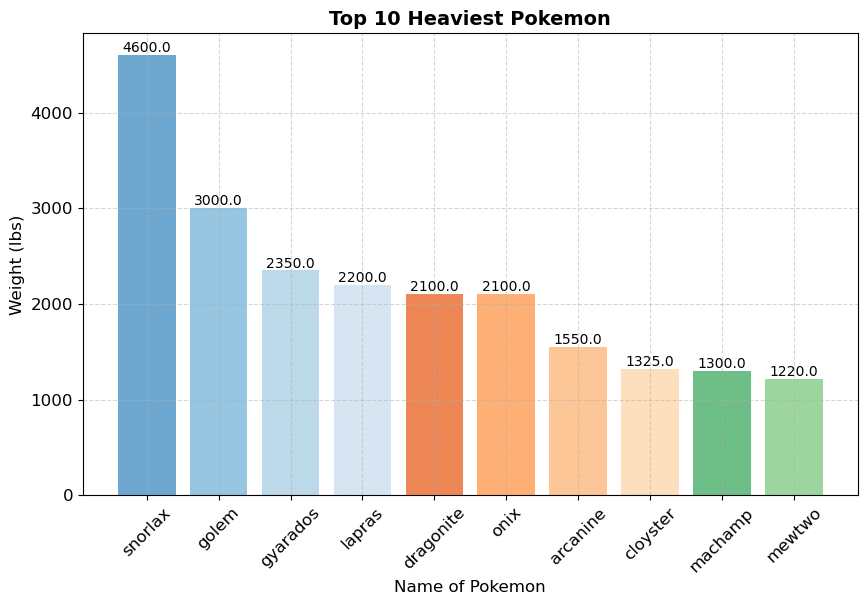

In [60]:
# create a bar chart of top 10 heaviest pokemon

# Set a larger figure size
plt.figure(figsize=(10, 6))

# Set x axis and y axis
x_axis = df4["name"].head(10)
y_axis = df4["weight"].head(10)

# Define a color map with a unique color for each bar
colors = plt.cm.tab20c(np.arange(len(x_axis)))

# Plot weight of Pokemon with a unique color for each bar
plt.bar(x_axis, y_axis, color=colors, alpha=0.7)

# Add data labels to the bars
for x, y in zip(x_axis, y_axis):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Customize plot labels and title
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Name of Pokemon", fontsize=12)
plt.ylabel("Weight (lbs)", fontsize=12)
plt.title("Top 10 Heaviest Pokemon", fontsize=14, fontweight='bold')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Save the plot to the Resources folder
plt.savefig("Resources/Top 10 Heaviest Pokemon.png")

# Show the modified plot
plt.show()

In [61]:
# which types of pokemon have the overall highest stats?
# create a new dataframe with the total stats and type 1 columns
df2 = df1[["type 1", "Total Stats"]]

# show only the highest stat for each type
df2 = df2.groupby(["type 1"]).max()

# sort the dataframe by total stats
df2 = df2.sort_values("Total Stats", ascending=False)

df2



,Total Stats
type 1,
psychic,680
dragon,600
electric,580
fire,580
ice,580
normal,540
water,540
grass,525
rock,515


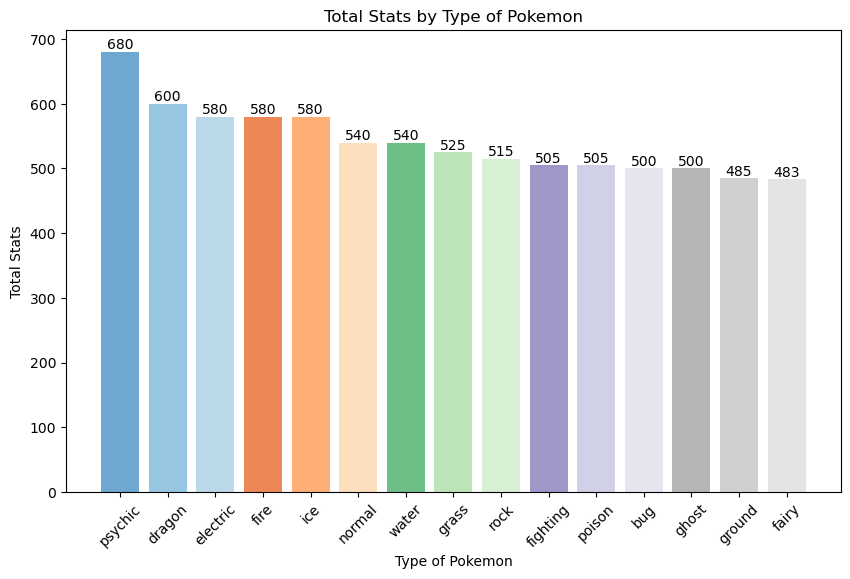

In [62]:
# create a bar chart of the highest total stats for each type

# Set a larger figure size
plt.figure(figsize=(10, 6))

# Set x axis and y axis
x_axis = df2.index
y_axis = df2["Total Stats"]

# Define a color map with a unique color for each bar
colors = plt.cm.tab20c(np.linspace(0, 1, len(df2)))

# Plot average HP for each type of Pokemon with a unique color for each bar
plt.bar(x_axis, y_axis, color=colors, alpha=0.7)

# Add data labels to the bars
for x, y in zip(x_axis, y_axis):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Customize plot labels and title
plt.xticks(rotation=45)
plt.xlabel("Type of Pokemon")
plt.ylabel("Total Stats")
plt.title("Total Stats by Type of Pokemon")

# Save the plot to the Resources folder
plt.savefig("Resources/Total Stats by Type of Pokemon.png")

# Show the modified plot
plt.show()

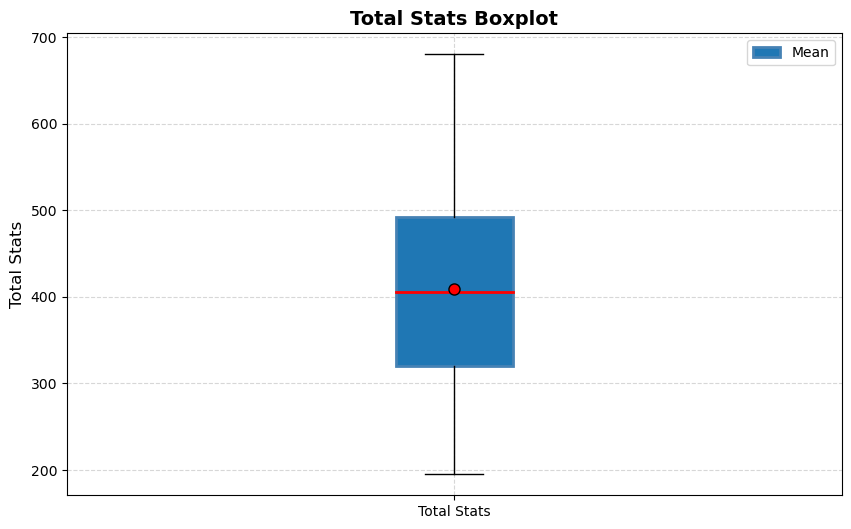

In [63]:
# Create a boxplot for total stats with the median and outliers

# Set a larger figure size
plt.figure(figsize=(10, 6))

# Create a boxplot for total stats with the median and outliers
boxprops = dict(linewidth=2, color='steelblue')
medianprops = dict(linestyle='-', linewidth=2, color='red')
meanprops = dict(marker='o', markeredgecolor='black', markerfacecolor='red', markersize=8)
plt.boxplot(df1["Total Stats"], labels=["Total Stats"], showmeans=True, showfliers=True,
            boxprops=boxprops, medianprops=medianprops, meanprops=meanprops, patch_artist=True)

# Customize plot labels and title
plt.title("Total Stats Boxplot", fontsize=14, fontweight='bold')
plt.ylabel("Total Stats", fontsize=12)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Add a legend
plt.legend(['Mean'])

# Save the plot to the Resources folder
plt.savefig("Resources/Total Stats Boxplot.png")

# Show the modified plot
plt.show()

In [64]:
# which individual pokemon have the highest stats?

# create a new dataframe with the total stats and name columns
df3 = df1[["name", "Total Stats"]]

# sort the dataframe by total stats
df3 = df3.sort_values("Total Stats", ascending=False)

#reset index at 1
df3 = df3.reset_index(drop=True)

# make the index start at 1 instead of 0
df3.index = np.arange(1, len(df3) + 1)

# show the top 10 pokemon with the highest total stats
df3.head(10)

,name,Total Stats
1,mewtwo,680
2,mew,600
3,dragonite,600
4,articuno,580
5,moltres,580
6,zapdos,580
7,arcanine,555
8,snorlax,540
9,gyarados,540
10,lapras,535


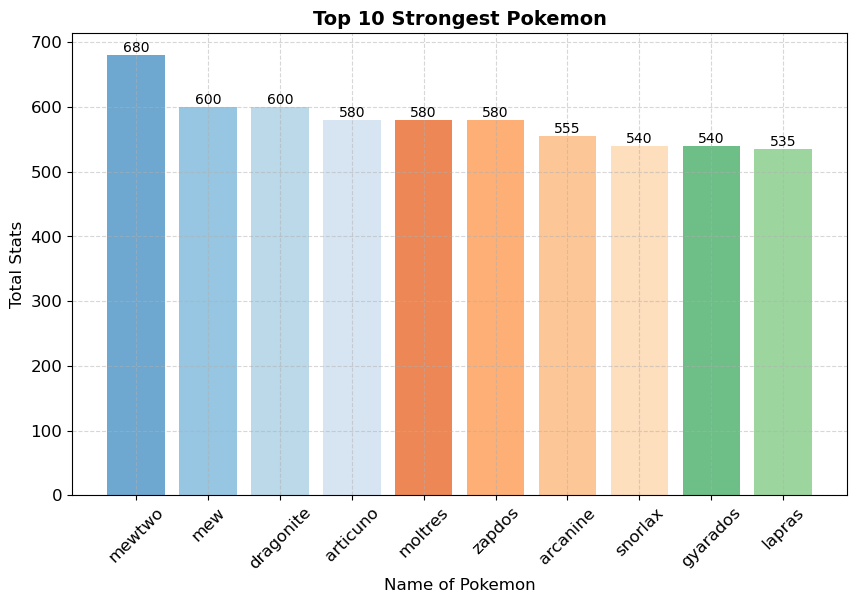

In [65]:
# create a bar chart of the highest individual total stats for the top 10 highest stats pokemon

# Set a larger figure size
plt.figure(figsize=(10, 6))

# Set x axis and y axis
x_axis = df3["name"].head(10)
y_axis = df3["Total Stats"].head(10)

# Define a color map with a unique color for each bar
colors = plt.cm.tab20c(np.arange(len(x_axis)))

# Plot average HP for each type of Pokemon with a unique color for each bar
plt.bar(x_axis, y_axis, color=colors, alpha=0.7)

# Add data labels to the bars
for x, y in zip(x_axis, y_axis):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Customize plot labels and title
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Name of Pokemon", fontsize=12)
plt.ylabel("Total Stats", fontsize=12)
plt.title("Top 10 Strongest Pokemon", fontsize=14, fontweight='bold')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Save the plot to the Resources folder
plt.savefig("Resources/Top 10 Strongest Pokemon.png")

# Show the modified plot
plt.show()

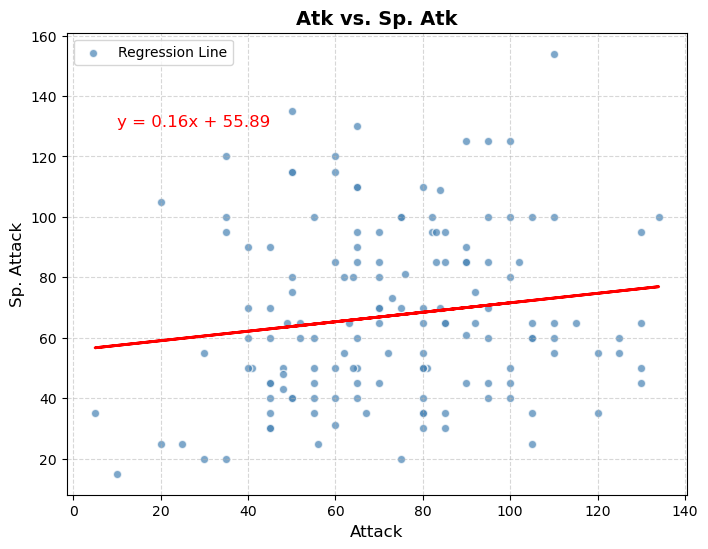

Correlation coefficient (r^2): 0.15


<Figure size 640x480 with 0 Axes>

In [66]:
# create a liner regression for weight and speed
x_values = df1["Attack"]
y_values = df1["Sp. Atk"]

# Call linreg() function
linreg(x_values, y_values, "Atk vs. Sp. Atk", "Attack", "Sp. Attack", (10, 130))

# Save the plot to the Resources folder
plt.savefig("Resources/Atk vs. Sp. Atk.png")